In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
from IPython.display import Image
#from IPython.display import clear_output
import time
#import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate

In [2]:
from os import listdir
from os.path import isfile, join

class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'\\'+self.local_dir

In [3]:
class Loader:
    df = pd.DataFrame()
    
    #@abstractmethod
    def load_data(self, file_name):
        pass
    
    #@abstractmethod
    def get_df(self):
        pass
    
    def size(self):
        return len(self.df)

In [4]:
from typing import Callable
 
class CSVLoader(Loader):
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
        
    def load_data(self, _prepare_data: Callable[[pd.DataFrame], pd.DataFrame] = None):
        self.df = pd.read_csv(self.file_path_manager.retrieve_full_path(), compression='gzip', low_memory=False)
        if _prepare_data:
            self.df = _prepare_data(self.df)
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)  

In [5]:
def clean_data(df):
    df['Datetime_updated'] = pd.to_datetime(df['Datetime_updated'], infer_datetime_format=True)
    df['Datetime_updated_seconds'] = pd.to_datetime(df['Datetime_updated_seconds'], infer_datetime_format=True)
    return df

In [6]:
loader = CSVLoader(FilePathManager('Data_API.csv.gz'))
loader.load_data(clean_data)
df = loader.get_df()

In [7]:
df.shape

(6071027, 24)

In [8]:
df.columns

Index(['Smart_contract', 'ID_token', 'Transaction_hash', 'Seller_address',
       'Seller_username', 'Buyer_address', 'Buyer_username', 'Image_url_1',
       'Image_url_2', 'Image_url_3', 'Image_url_4', 'Price_Crypto', 'Crypto',
       'Price_USD', 'Name', 'Description', 'Collection', 'Market',
       'Datetime_updated', 'Datetime_updated_seconds', 'Permanent_link',
       'Unique_id_collection', 'Collection_cleaned', 'Category'],
      dtype='object')

In [9]:
df.tail()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
6071022,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,1.641200e+04,0x346561b3f7a233c4245f91c68940b2d750df26ef1b04...,0x9f37284b3a538be8eea2d401b595f44c96d39b70,NaN,0xa353401738e7ec6a4db9c0ee4c66eb5252f681c4,NaN,https://lh3.googleusercontent.com/isSUPEsJJWpF...,https://ipfs.pixura.io/ipfs/QmSHxximuHUZV54pAA...,https://lh3.googleusercontent.com/isSUPEsJJWpF...,...,Pájaro Doctor 13/40,Digital piece made by using a variety of softw...,Superrare,OpenSea,2021-04-01,2021-04-01 00:00:52,https://opensea.io/assets/0xb932a70a57673d89f4...,"('Superrare', '16412')",Superrare,Art
6071023,0x495f947276749ce646f68ac8c248420045cb7b5e,1.062274e+77,0xd507715bb835252a65d572037ac8eb36854b05ecc672...,0xeada96bf164643bdfe3e657a9f380854694a49dd,Mistcop,0xe2fe53f9bcb33e3e0fc65f2f627ca4eb8e958347,NaN,https://lh3.googleusercontent.com/qdzZDtYHHVdi...,NaN,https://lh3.googleusercontent.com/qdzZDtYHHVdi...,...,Kawaii Monster #2,NaN,Kawaii-monsters,OpenSea,2021-04-01,2021-04-01 00:00:50,https://opensea.io/assets/0x495f947276749ce646...,"('Kawaii-monsters', '1062274196422536302774639...",Kawaiimonster,Other
6071024,0x495f947276749ce646f68ac8c248420045cb7b5e,4.602588e+76,0x4cb90a775619a9483c003050de47c403fae957e5352b...,0x65c1b9ae4e4d8dcccfd3dc41b940840fe8570f2a,International_Megadigital,0x220d20310f52d97e353028ebd742d2c690eaf0a1,WanderlustNFT,https://lh3.googleusercontent.com/SoTAV8k4UC90...,NaN,https://lh3.googleusercontent.com/SoTAV8k4UC90...,...,Bishoujo Originals - #4977,The original source for collectible Bishoujo h...,Moe-tokens,OpenSea,2021-04-01,2021-04-01 00:00:51,https://opensea.io/assets/0x495f947276749ce646...,"('Moe-tokens', '460258807127632723165921220381...",Moetoken,Other
6071025,0x495f947276749ce646f68ac8c248420045cb7b5e,8.060875e+76,0x76068e84592753bb1e076c5320c7e3ecfe41e4da8ebe...,0xb236f00808a9f88b3117af95c881966288dfbcbb,TheOfficialGarrett,0xd543a0be0684f0556786586b83f4c9fd16a4dc35,kittylord,https://lh3.googleusercontent.com/AWwjq0cuTjHF...,NaN,https://lh3.googleusercontent.com/AWwjq0cuTjHF...,...,Smile 0066,Coming to you hot! Not Fun Tokens or (NFT's)!...,Not-fun-tokens,OpenSea,2021-04-01,2021-04-01 00:00:40,https://opensea.io/assets/0x495f947276749ce646...,"('Not-fun-tokens', '80608753425034673252014442...",Notfuntoken,Other
6071026,0x495f947276749ce646f68ac8c248420045cb7b5e,8.060875e+76,0x6efdcfde266760201767ba099c1f10f47937a8098720...,0xb236f00808a9f88b3117af95c881966288dfbcbb,TheOfficialGarrett,0xd543a0be0684f0556786586b83f4c9fd16a4dc35,kittylord,https://lh3.googleusercontent.com/1PSAAdTKWB5p...,NaN,https://lh3.googleusercontent.com/1PSAAdTKWB5p...,...,Smile 0023,Coming to you hot! Not Fun Tokens or (NFT's)!...,Not-fun-tokens,OpenSea,2021-04-01,2021-04-01 00:00:40,https://opensea.io/assets/0x495f947276749ce646...,"('Not-fun-tokens', '80608753425034673252014442...",Notfuntoken,Other


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071027 entries, 0 to 6071026
Data columns (total 24 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Smart_contract            object        
 1   ID_token                  float64       
 2   Transaction_hash          object        
 3   Seller_address            object        
 4   Seller_username           object        
 5   Buyer_address             object        
 6   Buyer_username            object        
 7   Image_url_1               object        
 8   Image_url_2               object        
 9   Image_url_3               object        
 10  Image_url_4               object        
 11  Price_Crypto              float64       
 12  Crypto                    object        
 13  Price_USD                 float64       
 14  Name                      object        
 15  Description               object        
 16  Collection                object        
 17  Market  

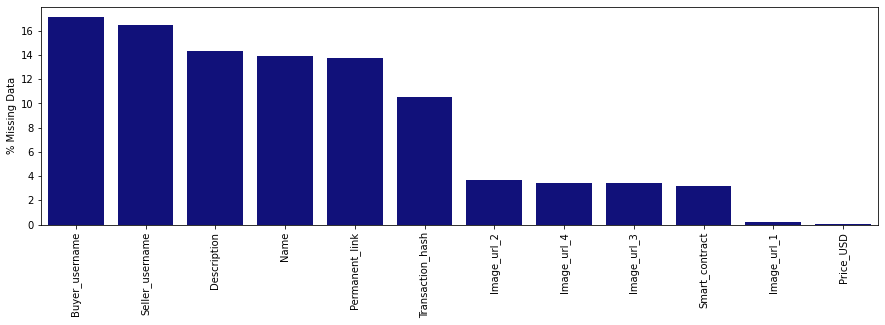

In [65]:
# Missing Values by Column
missing = df.isnull().sum()
pct_missing = missing/missing.sum()*100
pct_missing = pct_missing.sort_values(ascending=False)
pct_missing = pct_missing[pct_missing>0]

plt.figure(figsize=(15, 4))
sns.barplot(x=pct_missing.index, y=pct_missing, color='darkblue')
plt.ylabel('% Missing Data')
plt.xticks(rotation=90)
plt.show()

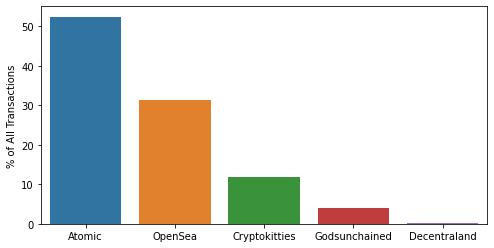

In [86]:
market_counts = df['Market'].value_counts(normalize=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=market_counts.index, y=market_counts*100)
plt.ylabel('% of All Transactions')
plt.show()

In [21]:
# Number of different cryptocurrencies used
len(df['Crypto'].unique())

160

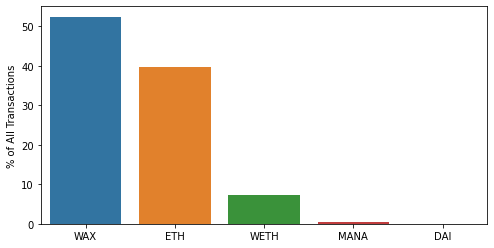

In [243]:
# Top 5 cryptocurrencies used
crypto_counts = pd.DataFrame( df['Crypto'].value_counts(normalize=True).head(5) )

plt.figure(figsize=(8, 4))
sns.barplot(x=crypto_counts.index, y=crypto_counts['Crypto']*100)
plt.ylabel('% of All Transactions')
plt.show()

In [13]:
# Unique Collections
len(df['Collection'].unique())

6283

In [458]:
# Unique NFTs
print( '{:,}'.format( len(df['ID_token'].unique()) ) )

4,040,908


In [459]:
tokens = df['Unique_id_collection'].value_counts()
print( '# of Tokens Sold Just Once =', '{:,}'.format( len(tokens[tokens==1]) ) )
print( '% of Tokens Sold Just Once =', round(len(tokens[tokens==1])/len(tokens)*100,1),'%' )

print( '\n# of Tokens Sold More Than Once =', '{:,}'.format( len(tokens[tokens>1]) ) )
print( '% of Tokens Sold More Than Once =', round(len(tokens[tokens>1])/len(tokens)*100,1),'%' )

# of Tokens Sold Just Once = 3,710,713
% of Tokens Sold Just Once = 79.3 %

# of Tokens Sold More Than Once = 967,529
% of Tokens Sold More Than Once = 20.7 %


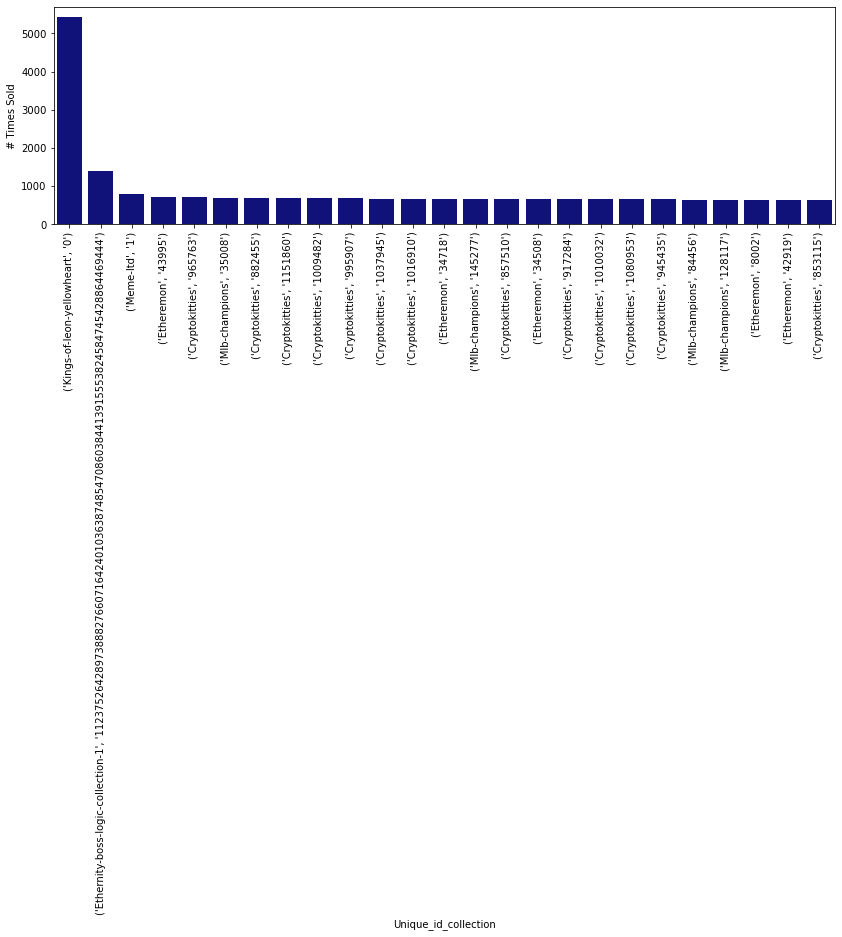

In [467]:
# Top 25 NFTs by Resale
plt.figure(figsize=(14, 4))
n = 25
sns.barplot(x = tokens.head(n).index, y = tokens.head(n), order=tokens.head(n).index, color='darkblue')
plt.ylabel('# Times Sold')
plt.xlabel('Unique_id_collection')
plt.xticks(rotation=90)
plt.show()

In [278]:
tokens.index[0]

"('Kings-of-leon-yellowheart', '0')"

In [315]:
kol_yh_0 = df.loc[df['Unique_id_collection']==tokens.index[0],]
kol_yh_0.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
5767243,0x557430421f8f3ed0a92aca211f1c05ad7b606288,0.0,0x2fc5b5867b782b821135ea26add6b54a13ace84b59e0...,0x95a08c297ad5861734c4440fd5ac6b80a8bf9228,YellowHeartFactories,0x41fd372e4558aba9b1e6bedf30494bf7c69c6cc9,ss21,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,https://yellowheart-nft.s3.us-east-2.amazonaws...,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,...,NFT Yourself,What comes with the NFT:\n\n1 - Digital album ...,Kings-of-leon-yellowheart,OpenSea,2021-03-20,2021-03-20 00:08:31,https://opensea.io/assets/0x557430421f8f3ed0a9...,"('Kings-of-leon-yellowheart', '0')",King,Art
5767259,0x557430421f8f3ed0a92aca211f1c05ad7b606288,0.0,0xcc54966ffb4ab60d1d1f51cc0857caf51f9866e117f5...,0x95a08c297ad5861734c4440fd5ac6b80a8bf9228,YellowHeartFactories,0x1dbc9a51174900551dff9649758b50215d60db29,NaN,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,https://yellowheart-nft.s3.us-east-2.amazonaws...,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,...,NFT Yourself,What comes with the NFT:\n\n1 - Digital album ...,Kings-of-leon-yellowheart,OpenSea,2021-03-20,2021-03-20 00:03:17,https://opensea.io/assets/0x557430421f8f3ed0a9...,"('Kings-of-leon-yellowheart', '0')",King,Art
5767264,0x557430421f8f3ed0a92aca211f1c05ad7b606288,0.0,0xdc84520e3dde24d487277d1ed6e4aa38f13fbcae0651...,0x95a08c297ad5861734c4440fd5ac6b80a8bf9228,YellowHeartFactories,0xb7a14918d936776e6fa57597f3dfb8b61a5d25ca,NaN,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,https://yellowheart-nft.s3.us-east-2.amazonaws...,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,...,NFT Yourself,What comes with the NFT:\n\n1 - Digital album ...,Kings-of-leon-yellowheart,OpenSea,2021-03-19,2021-03-19 23:59:39,https://opensea.io/assets/0x557430421f8f3ed0a9...,"('Kings-of-leon-yellowheart', '0')",King,Art
5767267,0x557430421f8f3ed0a92aca211f1c05ad7b606288,0.0,0x26f179bdc068e66da6f13bfaf3f8b0201ac19a229ee6...,0x95a08c297ad5861734c4440fd5ac6b80a8bf9228,YellowHeartFactories,0x6c67b9a0bae1968e8ddf939cb3e73976ef9026a4,gmancode,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,https://yellowheart-nft.s3.us-east-2.amazonaws...,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,...,NFT Yourself,What comes with the NFT:\n\n1 - Digital album ...,Kings-of-leon-yellowheart,OpenSea,2021-03-19,2021-03-19 23:59:37,https://opensea.io/assets/0x557430421f8f3ed0a9...,"('Kings-of-leon-yellowheart', '0')",King,Art
5767269,0x557430421f8f3ed0a92aca211f1c05ad7b606288,0.0,0x4a4303241fac1154a9d7a3feace7368fc9e2b6ce2dfa...,0x95a08c297ad5861734c4440fd5ac6b80a8bf9228,YellowHeartFactories,0xef77824a42200c897f724e50f382d4aba76ca7bc,Mark0in,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,https://yellowheart-nft.s3.us-east-2.amazonaws...,https://lh3.googleusercontent.com/2JU0h9ePuFjK...,...,NFT Yourself,What comes with the NFT:\n\n1 - Digital album ...,Kings-of-leon-yellowheart,OpenSea,2021-03-19,2021-03-19 23:59:18,https://opensea.io/assets/0x557430421f8f3ed0a9...,"('Kings-of-leon-yellowheart', '0')",King,Art


__For the single most traded NFT, there are frequent transactions every few seconds from just one seller over a 14 day period for a digital album promotional by the band Kings of Leon.  No evidence for fraud.__

In [420]:
print(kol_yh_0.iloc[1,15])

What comes with the NFT:

1 - Digital album download

1 - Limited edition NFT Golden Eye Vinyl

1 - Digital collectible album artwork

All unsold limited edition NFTs will be burned after sale period ends.

All proceeds will go to the Live Nation's Crew Nation Fund. Token holders will also receive a limited-edition physical Golden Eye vinyl featuring the band's 8th studio album When You See Yourself.

You can reedeem on [www.yellowheart.io](https://www.yellowheart.io/redeem.html). For more details, join YellowHeart's [Discord server](https://discord.gg/5wU4v6qr6v).


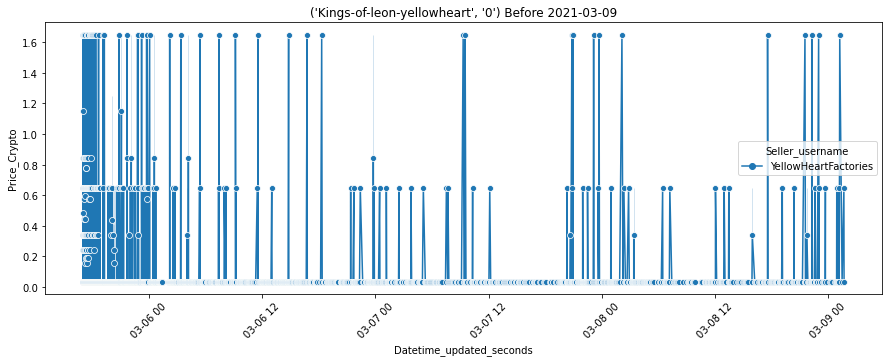

In [414]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = kol_yh_0.loc[(kol_yh_0['Datetime_updated_seconds']<'2021-03-09 02:00:00')], 
             x='Datetime_updated_seconds', y='Price_Crypto', hue = 'Seller_username', style= 'Seller_username', markers=True)
plt.xticks(rotation=45)
plt.title(str(tokens.index[0])+' Before 2021-03-09')
plt.show()

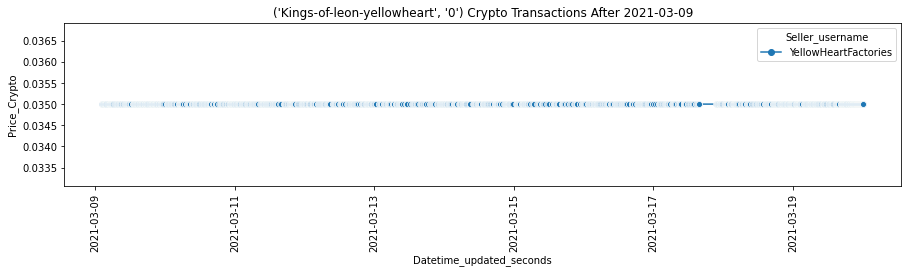

In [415]:
plt.figure(figsize=(15, 3))
sns.lineplot(data = kol_yh_0.loc[(kol_yh_0['Datetime_updated_seconds']>'2021-03-09 02:00:00')], 
             x='Datetime_updated_seconds', y='Price_Crypto', hue = 'Seller_username', style= 'Seller_username', markers=True)
plt.xticks(rotation=90)
plt.title(str(tokens.index[0])+' Crypto Transactions After 2021-03-09')
plt.show()

__Repeated transaction hashes (and same Market, Collection, Smart Contract, and Buyer) across different NFTs and Sellers  - How is this possible?__

In [461]:
transactions = df[df['Transaction_hash'] =='0xd0ff034f9080fe779aeb86c365347530abc725fbba123ee89e14ce7daeb4bd00']
transactions

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
235559,NaN,10136853.0,0xd0ff034f9080fe779aeb86c365347530abc725fbba12...,0x6958f5e95332d93d21af0d7b9ca85b8212fee0a5,NaN,0x1c012b03f1c2dea274d2eeeb566b0eeabfe3af1a,NaN,https://card.godsunchained.com/?id=402&q=2,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2021-03-11,2021-03-11 01:40:41,NaN,"('Godsunchained', '10136853.0')",Godsunchained,Games
5854970,0x0e3a2a1f2146d86a604adc220b4967a898d7fe07,9876645.0,0xd0ff034f9080fe779aeb86c365347530abc725fbba12...,0xc579e57351e561ff9d3229661c2d09cdb8e6f1d7,NaN,0x1c012b03f1c2dea274d2eeeb566b0eeabfe3af1a,NaN,https://lh3.googleusercontent.com/tiKn15yIjdVF...,https://card.godsunchained.com/?id=402&q=2&w=7...,https://lh3.googleusercontent.com/tiKn15yIjdVF...,...,Blessed Chimera ID #9876645,Deadly. Flank. Frontline. Protected. Ward.\nRo...,Gods-unchained,OpenSea,2021-03-11,2021-03-11 01:40:57,https://opensea.io/assets/0x0e3a2a1f2146d86a60...,"('Gods-unchained', '9876645')",Godsunchained,Games
5854971,0x0e3a2a1f2146d86a604adc220b4967a898d7fe07,9466317.0,0xd0ff034f9080fe779aeb86c365347530abc725fbba12...,0x31d173ea66fa8fba38b3ddb798c1c1098f3ae8c5,NaN,0x1c012b03f1c2dea274d2eeeb566b0eeabfe3af1a,NaN,https://lh3.googleusercontent.com/tiKn15yIjdVF...,https://card.godsunchained.com/?id=402&q=2&w=7...,https://lh3.googleusercontent.com/tiKn15yIjdVF...,...,Blessed Chimera ID #9466317,Deadly. Flank. Frontline. Protected. Ward.\nRo...,Gods-unchained,OpenSea,2021-03-11,2021-03-11 01:40:59,https://opensea.io/assets/0x0e3a2a1f2146d86a60...,"('Gods-unchained', '9466317')",Godsunchained,Games
5854972,0x0e3a2a1f2146d86a604adc220b4967a898d7fe07,9831609.0,0xd0ff034f9080fe779aeb86c365347530abc725fbba12...,0xd6a2977b737f6ab6b1899cf0b094464ae6216b15,ImportantClassicBuffaloOfEfficiency,0x1c012b03f1c2dea274d2eeeb566b0eeabfe3af1a,NaN,https://lh3.googleusercontent.com/tiKn15yIjdVF...,https://card.godsunchained.com/?id=402&q=2&w=7...,https://lh3.googleusercontent.com/tiKn15yIjdVF...,...,Blessed Chimera ID #9831609,Deadly. Flank. Frontline. Protected. Ward.\nRo...,Gods-unchained,OpenSea,2021-03-11,2021-03-11 01:40:55,https://opensea.io/assets/0x0e3a2a1f2146d86a60...,"('Gods-unchained', '9831609')",Godsunchained,Games
5854974,0x0e3a2a1f2146d86a604adc220b4967a898d7fe07,10173132.0,0xd0ff034f9080fe779aeb86c365347530abc725fbba12...,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,jezza,0x1c012b03f1c2dea274d2eeeb566b0eeabfe3af1a,NaN,https://lh3.googleusercontent.com/tiKn15yIjdVF...,https://card.godsunchained.com/?id=402&q=2&w=7...,https://lh3.googleusercontent.com/tiKn15yIjdVF...,...,Blessed Chimera ID #10173132,Deadly. Flank. Frontline. Protected. Ward.\nRo...,Gods-unchained,OpenSea,2021-03-11,2021-03-11 01:41:01,https://opensea.io/assets/0x0e3a2a1f2146d86a60...,"('Gods-unchained', '10173132')",Godsunchained,Games
5854975,0x0e3a2a1f2146d86a604adc220b4967a898d7fe07,10762353.0,0xd0ff034f9080fe779aeb86c365347530abc725fbba12...,0xb8a501e8c738470230ff13a9b81877d46d93b037,NaN,0x1c012b03f1c2dea274d2eeeb566b0eeabfe3af1a,NaN,https://lh3.googleusercontent.com/tiKn15yIjdVF...,https://card.godsunchained.com/?id=402&q=2&w=7...,https://lh3.googleusercontent.com/tiKn15yIjdVF...,...,Blessed Chimera ID #10762353,Deadly. Flank. Frontline. Protected. Ward.\nRo...,Gods-unchained,OpenSea,2021-03-11,2021-03-11 01:41:04,https://opensea.io/assets/0x0e3a2a1f2146d86a60...,"('Gods-unchained', '10762353')",Godsunchained,Games
5854976,0x0e3a2a1f2146d86a604adc220b4967a898d7fe07,9548883.0,0xd0ff034f9080fe779aeb86c365347530abc725fbba12...,0xd3e7e8cdc5f9c07bed4516901daa1d4a7c8e8bde,humusmandala,0x1c012b03f1c2dea274d2eeeb566b0eeabfe3af1a,NaN,https://lh3.googleusercontent.com/tiKn15yIjdVF...,https://card.godsunchained.com/?id=402&q=2&w=7...,https://lh3.googleusercontent.com/tiKn15yIjdVF...,..

__Second most traded NFT__

In [316]:
tokens.index[1]

"('Ethernity-boss-logic-collection-1', '112375264289738882766071642401036387485470860384413915553824584745428864469444')"

In [317]:
eblc_1 = df.loc[df['Unique_id_collection']==tokens.index[1],]
eblc_1.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
5683264,0x495f947276749ce646f68ac8c248420045cb7b5e,1.123753e+77,0xa6f43ee6f3e3cfcc56896c72bb7c90c5909b3d7677bf...,0x720ebc47d7821bfbfc0d1dcbbd65fe36e31d20fc,claire1,0xa9bc6c57b6d252cfbfe6323f9d3229f751a5138b,ArtxHunter,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,NaN,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,...,Base Shadowless,"Exclusive Boss Logic ""Shadowless"" card, 2,500 ...",Ethernity-boss-logic-collection-1,OpenSea,2021-03-31,2021-03-31 22:17:59,https://opensea.io/assets/0x495f947276749ce646...,"('Ethernity-boss-logic-collection-1', '1123752...",Ethernitybosslogiccollection,Games
5683936,0x495f947276749ce646f68ac8c248420045cb7b5e,1.123753e+77,0x942faf9963098818f2da96190c766a3e0710046d5ecf...,0x3089d5dccf383570ca6d2f11059753cf7618131a,dontfungthefungible,0xd076a47a30dd0e7e0bd45f2b9b1418902328f271,NaN,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,NaN,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,...,Base Shadowless,"Exclusive Boss Logic ""Shadowless"" card, 2,500 ...",Ethernity-boss-logic-collection-1,OpenSea,2021-03-31,2021-03-31 20:09:40,https://opensea.io/assets/0x495f947276749ce646...,"('Ethernity-boss-logic-collection-1', '1123752...",Ethernitybosslogiccollection,Games
5684603,0x495f947276749ce646f68ac8c248420045cb7b5e,1.123753e+77,0x61a50728ce3d680db4ff27305122f899463009c81aaa...,0x29c96932857e9c97da7473cd22589880ed98c774,frimax,0x1ad60130a2528c6f73a8c6e50758532949627dfd,jase,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,NaN,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,...,Base Shadowless,"Exclusive Boss Logic ""Shadowless"" card, 2,500 ...",Ethernity-boss-logic-collection-1,OpenSea,2021-03-31,2021-03-31 15:46:30,https://opensea.io/assets/0x495f947276749ce646...,"('Ethernity-boss-logic-collection-1', '1123752...",Ethernitybosslogiccollection,Games
5687542,0x495f947276749ce646f68ac8c248420045cb7b5e,1.123753e+77,0x40cf939e0445385d271779b66f810bcbf366bcea8784...,0x29c96932857e9c97da7473cd22589880ed98c774,frimax,0x6dbb9d989289bdd2f11ae7b65783ba8cac6027d0,cemm66,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,NaN,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,...,Base Shadowless,"Exclusive Boss Logic ""Shadowless"" card, 2,500 ...",Ethernity-boss-logic-collection-1,OpenSea,2021-03-31,2021-03-31 00:37:01,https://opensea.io/assets/0x495f947276749ce646...,"('Ethernity-boss-logic-collection-1', '1123752...",Ethernitybosslogiccollection,Games
5690026,0x495f947276749ce646f68ac8c248420045cb7b5e,1.123753e+77,0x0146c69fdbed3ba98fa60a92cc0db693f8bb73472ab8...,0x8a1221b0dddcb9893f29544d25a79529efa8d6f7,aetherius,0xf1ddef8097bf455b2a59ed8eb0b721d3e2d137ca,BossLogic1,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,NaN,https://lh3.googleusercontent.com/AHn8S3Y_eSuQ...,...,Base Shadowless,"Exclusive Boss Logic ""Shadowless"" card, 2,500 ...",Ethernity-boss-logic-collection-1,OpenSea,2021-03-30,2021-03-30 16:51:01,https://opensea.io/assets/0x495f947276749ce646...,"('Ethernity-boss-logic-collection-1', '1123752...",Ethernitybosslogiccollection,Games


__The second most traded NFT has little to no evidence of fraud.__

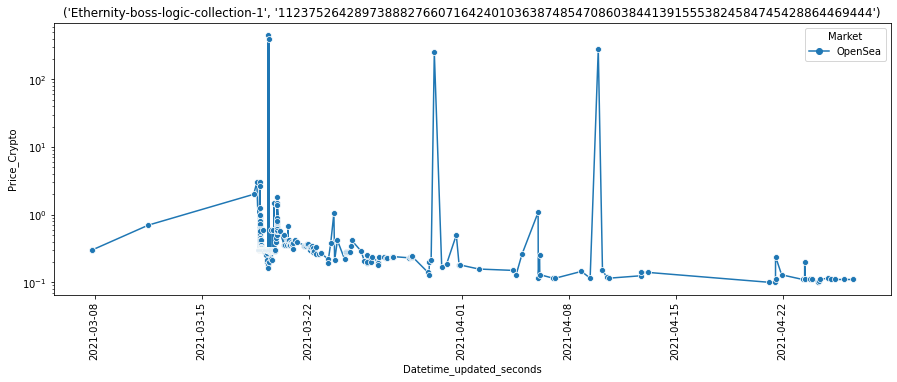

In [358]:
plt.figure(figsize=(15, 5))
p = sns.lineplot(data = eblc_1, 
             x='Datetime_updated_seconds', y='Price_Crypto', hue = 'Market', style= 'Market', markers=True)
p.set(yscale='log')
plt.xticks(rotation=90)
plt.title(tokens.index[1])
plt.show()

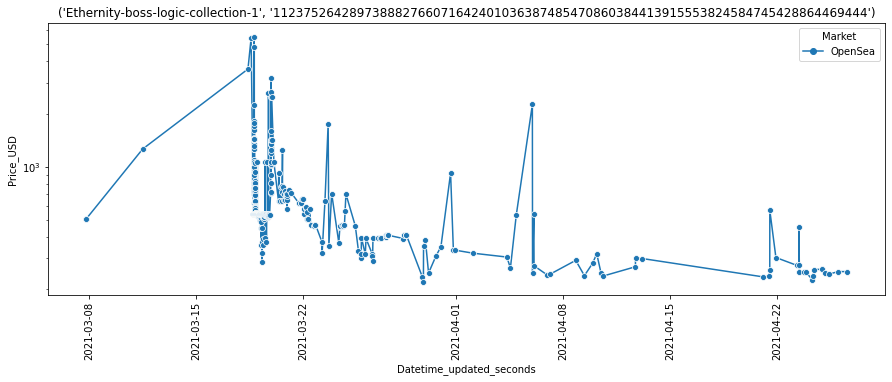

In [462]:
plt.figure(figsize=(15, 5))
p = sns.lineplot(data = eblc_1, 
             x='Datetime_updated_seconds', y='Price_USD', hue = 'Market', style= 'Market', markers=True)
p.set(yscale='log')
plt.xticks(rotation=90)
plt.title(tokens.index[1])
plt.show()

__Look at the top 15-20 NFTs with the most transactions on Market 'Cryptokitties'__

In [368]:
kitties = tokens[tokens.index.str.contains("Cryptokitties")].head(20)
kitties

('Cryptokitties', '965763')     704
('Cryptokitties', '882455')     696
('Cryptokitties', '1151860')    695
('Cryptokitties', '1009482')    680
('Cryptokitties', '995907')     678
('Cryptokitties', '1037945')    675
('Cryptokitties', '1016910')    675
('Cryptokitties', '857510')     664
('Cryptokitties', '917284')     659
('Cryptokitties', '1010032')    657
('Cryptokitties', '1080953')    657
('Cryptokitties', '945435')     655
('Cryptokitties', '853115')     642
('Cryptokitties', '1043670')    636
('Cryptokitties', '1067790')    621
('Cryptokitties', '966604')     604
('Cryptokitties', '1459126')     17
('Cryptokitties', '1137518')     14
('Cryptokitties', '1475')        14
('Cryptokitties', '864919')      14
Name: Unique_id_collection, dtype: int64

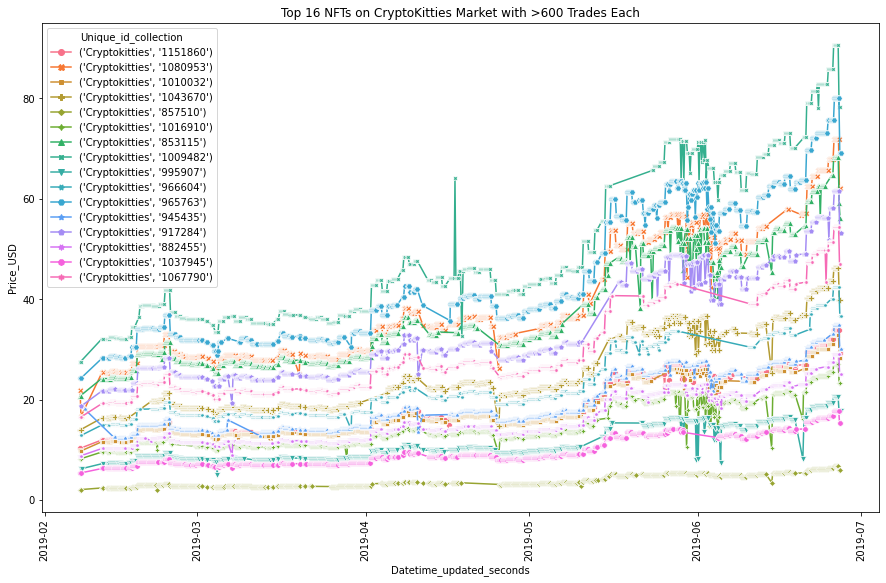

In [403]:
ck = df.loc[df['Unique_id_collection'].isin(kitties.index[0:16])]

plt.figure(figsize=(15, 9))
sns.lineplot(data = ck.loc[ck['Datetime_updated_seconds']>'2019-01'], 
             x='Datetime_updated_seconds', y='Price_USD', hue = 'Unique_id_collection', 
             style = 'Unique_id_collection', markers=True, dashes=False)
plt.xticks(rotation=90)
plt.title('Top 16 NFTs on CryptoKitties Market with >600 Trades Each')
plt.show()

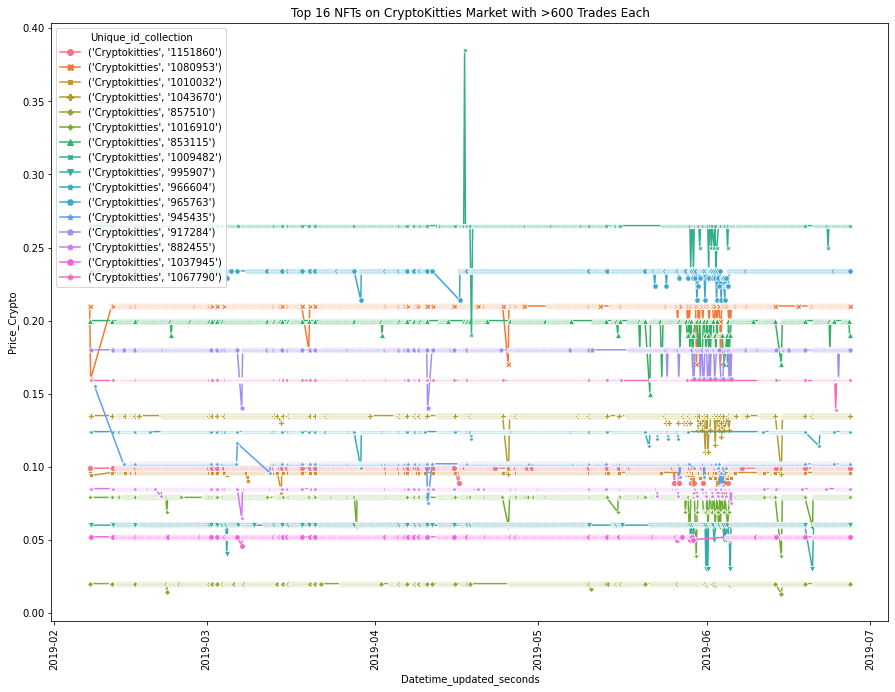

In [404]:
plt.figure(figsize=(15, 11))
sns.lineplot(data = ck.loc[ck['Datetime_updated_seconds']>'2019-01'], 
             x='Datetime_updated_seconds', y='Price_Crypto', hue = 'Unique_id_collection', 
             style = 'Unique_id_collection', markers=True, dashes=False)
plt.xticks(rotation=90)
plt.title('Top 16 NFTs on CryptoKitties Market with >600 Trades Each')
plt.show()

In [440]:
ck_desc = ck.loc[ck['Unique_id_collection']==kitties.index[0],'Description'].unique()
[print(i) for i in ck_desc]

nan
Hey! Ho! Let's go. I'm Ashes Squeenana. I'm freaky and belligerent, and sometimes even wondrous. I have made a mixtape for a duet with Enya, but I'm having a hard time tracking them down. You can help, right? In high school I was voted "biggest teacher's pet" and it definitely came true.


[None, None]

__Evidence of Wash Trading: Only 20 traders responsible for 700 transactions__

In [519]:
ck0_buyers = ck.loc[ck['Unique_id_collection']==kitties.index[0],'Buyer_address'].value_counts()
ck0_buyers

0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8    53
0x1c1ef71445010114f41ac1feb32dbf5d7281e90f    46
0x8acc1421ec98689461ff5777de8ad6648dc6d643    46
0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8    39
0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee    39
0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a    38
0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28    37
0xa21e0974137bf8400eb7dca606d9dcb190d79ed9    37
0x463215edb66fb6a8f0c979e739a731977617699f    36
0x236ef21dc36d0aec3990dd5ee84a9d5320644262    35
0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04    34
0xe738725cdcc41c91f734dd7b5b9659df994d6dda    34
0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c    34
0xf5aee6d7b838d5ede8aa65d31dbc11116545180c    33
0xbabda06088c242fb2a763aa7cc99706cb77ba735    32
0x7316e9cf94bef40d4981d66a5c41c38b6b32454c    28
0x6a47b60c377450a460d3eb828d534ee66eead668    28
0x87b77fabfeb869150b8e1b9462603f9a639c5fae    26
0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62    25
0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0    24
Name: Buyer_address,

In [520]:
ck0_sellers = ck.loc[ck['Unique_id_collection']==kitties.index[0],'Seller_address'].value_counts()
ck0_sellers

0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8    54
0x8acc1421ec98689461ff5777de8ad6648dc6d643    47
0x1c1ef71445010114f41ac1feb32dbf5d7281e90f    46
0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee    39
0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a    38
0xa21e0974137bf8400eb7dca606d9dcb190d79ed9    38
0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8    37
0x236ef21dc36d0aec3990dd5ee84a9d5320644262    36
0x463215edb66fb6a8f0c979e739a731977617699f    36
0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28    35
0xe738725cdcc41c91f734dd7b5b9659df994d6dda    34
0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c    34
0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04    32
0xbabda06088c242fb2a763aa7cc99706cb77ba735    32
0xf5aee6d7b838d5ede8aa65d31dbc11116545180c    31
0x7316e9cf94bef40d4981d66a5c41c38b6b32454c    29
0x6a47b60c377450a460d3eb828d534ee66eead668    29
0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62    26
0x87b77fabfeb869150b8e1b9462603f9a639c5fae    25
0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0    24
0x9f60aa00b653129170

__All 20 top buyers and sellers match__

In [533]:
wash_traders = ck0_sellers.index.intersection(ck0_buyers.index)
len(wash_traders)

20

__Next, look at top trading NFTs from Etheremon Collection__

In [468]:
tokens.index[3]

"('Etheremon', '43995')"

In [471]:
etheremon = tokens[tokens.index.str.contains("Etheremon")].head(15)
etheremon

('Etheremon', '43995')    711
('Etheremon', '34718')    673
('Etheremon', '34508')    662
('Etheremon', '8002')     645
('Etheremon', '42919')    645
('Etheremon', '41419')    632
('Etheremon', '38623')    600
('Etheremon', '41303')    591
('Etheremon', '28832')    536
('Etheremon', '287')        6
('Etheremon', '55537')      6
('Etheremon', '524')        5
('Etheremon', '41055')      5
('Etheremon', '215')        5
('Etheremon', '477')        5
Name: Unique_id_collection, dtype: int64

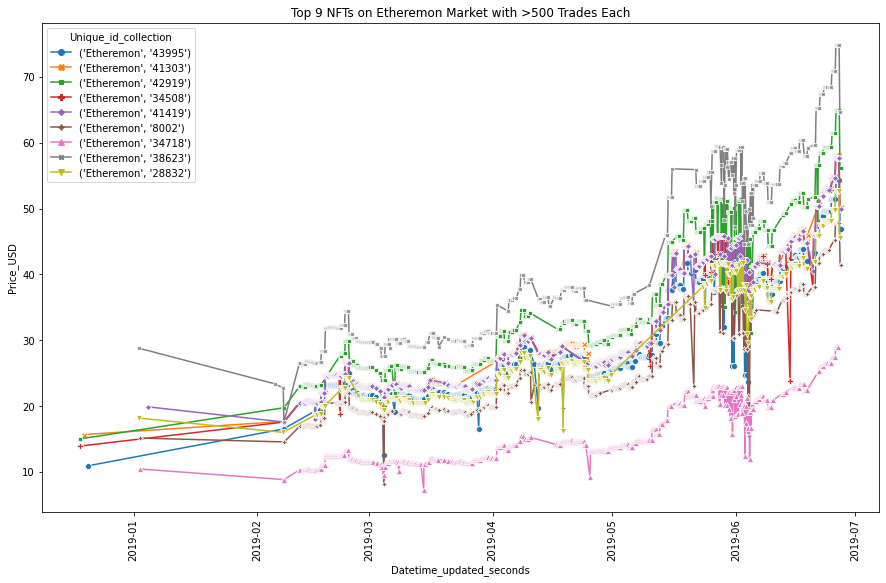

In [473]:
em = df.loc[df['Unique_id_collection'].isin(etheremon.index[0:9])]

plt.figure(figsize=(15, 9))
sns.lineplot(data = em, x='Datetime_updated_seconds', y='Price_USD', hue = 'Unique_id_collection', 
             style = 'Unique_id_collection', markers=True, dashes=False)
plt.xticks(rotation=90)
plt.title('Top 9 NFTs on Etheremon Collection with >500 Trades Each')
plt.show()

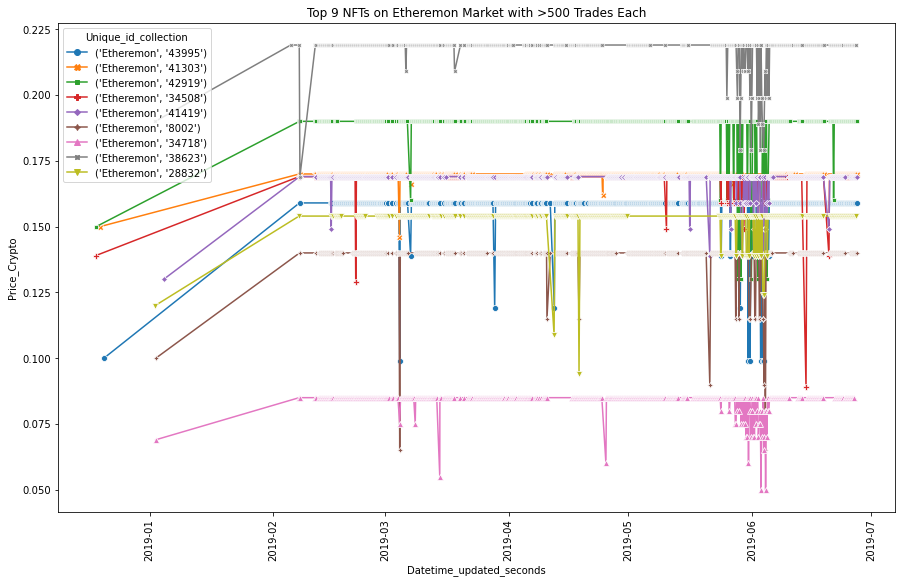

In [474]:
plt.figure(figsize=(15, 9))
sns.lineplot(data = em, x='Datetime_updated_seconds', y='Price_Crypto', hue = 'Unique_id_collection', 
             style = 'Unique_id_collection', markers=True, dashes=False)
plt.xticks(rotation=90)
plt.title('Top 9 NFTs on Etheremon Collection with >500 Trades Each')
plt.show()

__More evidence of Wash Trading. Again, only 20 traders responsible for 700 transactions__

In [479]:
em0_buyers = em.loc[em['Unique_id_collection']==etheremon.index[0],'Buyer_address'].value_counts()
em0_buyers

0xa21e0974137bf8400eb7dca606d9dcb190d79ed9    45
0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c    44
0x8acc1421ec98689461ff5777de8ad6648dc6d643    43
0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8    42
0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee    39
0x236ef21dc36d0aec3990dd5ee84a9d5320644262    39
0xe738725cdcc41c91f734dd7b5b9659df994d6dda    39
0x87b77fabfeb869150b8e1b9462603f9a639c5fae    38
0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8    38
0x6a47b60c377450a460d3eb828d534ee66eead668    38
0x463215edb66fb6a8f0c979e739a731977617699f    37
0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62    36
0x1c1ef71445010114f41ac1feb32dbf5d7281e90f    36
0xf5aee6d7b838d5ede8aa65d31dbc11116545180c    33
0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28    32
0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0    30
0x7316e9cf94bef40d4981d66a5c41c38b6b32454c    26
0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a    25
0xbabda06088c242fb2a763aa7cc99706cb77ba735    25
0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04    25
0xfe272af6c115a955a0

In [516]:
em0_sellers = em.loc[em['Unique_id_collection']==etheremon.index[0],'Seller_address'].value_counts()
em0_sellers

0xa21e0974137bf8400eb7dca606d9dcb190d79ed9    44
0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c    44
0x8acc1421ec98689461ff5777de8ad6648dc6d643    43
0xe738725cdcc41c91f734dd7b5b9659df994d6dda    42
0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8    41
0x236ef21dc36d0aec3990dd5ee84a9d5320644262    40
0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee    39
0x6a47b60c377450a460d3eb828d534ee66eead668    38
0x87b77fabfeb869150b8e1b9462603f9a639c5fae    38
0x463215edb66fb6a8f0c979e739a731977617699f    37
0x1c1ef71445010114f41ac1feb32dbf5d7281e90f    37
0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8    37
0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62    34
0xf5aee6d7b838d5ede8aa65d31dbc11116545180c    33
0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28    31
0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0    30
0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a    26
0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04    26
0x7316e9cf94bef40d4981d66a5c41c38b6b32454c    26
0xbabda06088c242fb2a763aa7cc99706cb77ba735    24
0x165b440662b38c8c2d

__Again, all 20 buyers and sellers match, AND they're the same 20 traders from CryptoKitties!__

In [522]:
len(em0_sellers.index.intersection(em0_buyers.index))

20

In [534]:
len(wash_traders.intersection(em0_buyers.index))

20

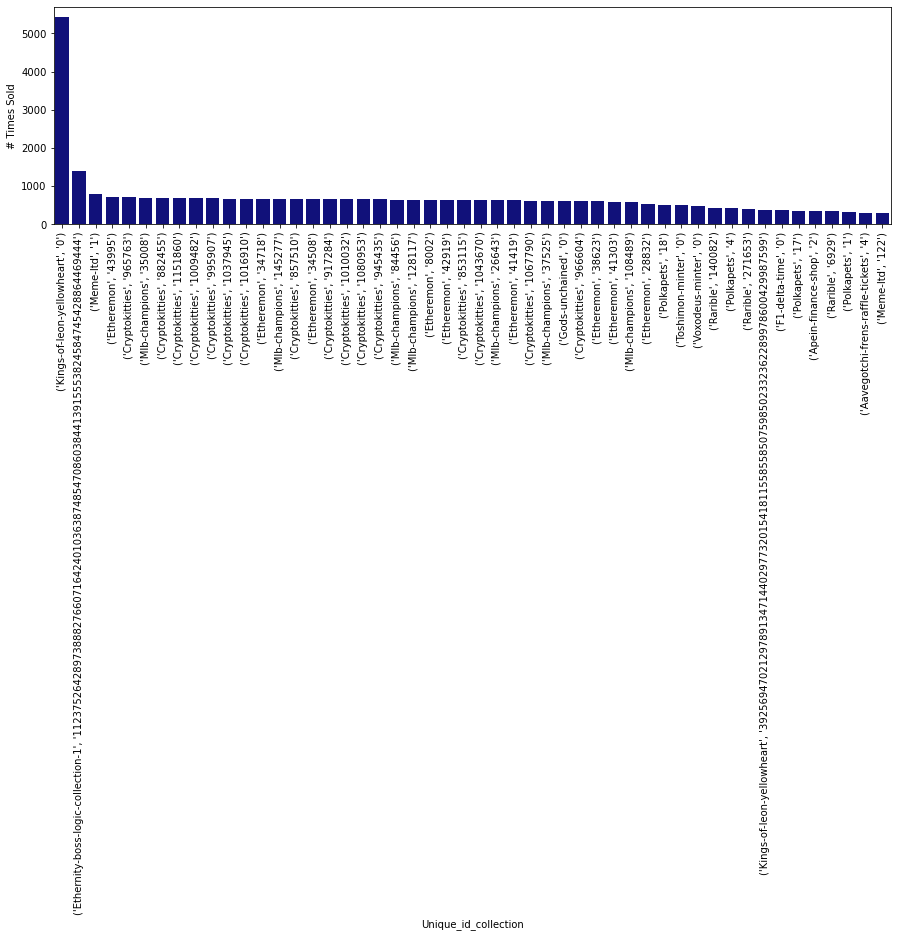

In [528]:
plt.figure(figsize=(15, 4))
n = 50
sns.barplot(x = tokens.head(n).index, y = tokens.head(n), order=tokens.head(n).index, color='darkblue')
plt.ylabel('# Times Sold')
plt.xlabel('Unique_id_collection')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def find_wash_trades():

    etheremon = tokens[tokens.index.str.contains("Etheremon")].head(10)
    
    em = df.loc[df['Unique_id_collection'].isin(etheremon.index[0:9])]

    em0_buyers = em.loc[em['Unique_id_collection']==etheremon.index[0],'Buyer_address'].value_counts()
    
    em0_sellers = em.loc[em['Unique_id_collection']==etheremon.index[0],'Seller_address'].value_counts()
    
    wash_traders_list = em0_sellers.index.intersection(em0_buyers.index)
    
    return len(wash_traders_list)

In [527]:
mlb_champs = tokens[tokens.index.str.contains("Mlb-champions")].head(10)
mlb_champs

('Mlb-champions', '35008')     701
('Mlb-champions', '145277')    671
('Mlb-champions', '84456')     650
('Mlb-champions', '128117')    648
('Mlb-champions', '26643')     633
('Mlb-champions', '37525')     619
('Mlb-champions', '108489')    585
('Mlb-champions', '141761')      9
('Mlb-champions', '144000')      8
('Mlb-champions', '148238')      5
Name: Unique_id_collection, dtype: int64

In [532]:
polkapets = tokens[tokens.index.str.contains("Polkapets")].head(30)
polkapets

('Polkapets', '18')    505
('Polkapets', '4')     416
('Polkapets', '17')    352
('Polkapets', '1')     322
('Polkapets', '25')    269
('Polkapets', '19')    257
('Polkapets', '5')     255
('Polkapets', '15')    225
('Polkapets', '16')    217
('Polkapets', '14')    199
('Polkapets', '3')     190
('Polkapets', '21')    189
('Polkapets', '20')    186
('Polkapets', '10')    178
('Polkapets', '2')     176
('Polkapets', '11')    151
('Polkapets', '24')    137
('Polkapets', '13')    134
('Polkapets', '23')    130
('Polkapets', '12')    127
('Polkapets', '6')     127
('Polkapets', '28')    104
('Polkapets', '8')      82
('Polkapets', '22')     48
('Polkapets', '26')     38
('Polkapets', '7')      32
('Polkapets', '27')     32
Name: Unique_id_collection, dtype: int64

In [ ]:
# Rarible